In [263]:
#common
import pandas as pd
import numpy as np
import math
import random
import itertools

#scikit-learn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics as sklearn_metrics
from sklearn.neighbors import DistanceMetric

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

#matplotlib
import matplotlib.pyplot as plt

In [321]:
data_path = './data/'
plot_path = './plots/'
extracted_features = 'extracted_features.csv'

# Features analysis and preprocessing

In [3]:
df = pd.read_csv(data_path + extracted_features)
df.head(10)

,user_id,doc_id,interstroke_time,stroke_duration,start_x,start_y,stop_x,stop_y,direct_end_to_end_distance,mean_resultant_lenght,...,average_direction,length_of_trajectory,ratio_end_to_end_dist_and_length_of_trajectory,average_velocity,median_acceleration_at_first_5_points,midstroke_pressure,midstroke_area_covered,midstroke_finger_orientation,change_of_finger_orientation,phone_orientation
0,37,4,0.341,0.256,27.416,-27.113,12.3980,-32.960,16.1160,0.35736,...,-2.581200,16.1320,0.99898,63.018,-432.24,0.320,0.044444,0.0,0,1
1,37,4,0.913,0.086,21.771,-30.037,9.8778,-33.867,12.4950,0.26504,...,-2.199400,12.5960,0.99197,146.470,5117.70,0.600,0.088889,0.0,0,1
2,37,4,0.733,0.111,10.886,-34.169,26.9120,-34.673,16.0340,0.99118,...,0.086288,16.2030,0.98959,145.970,-3563.50,0.480,0.044444,0.0,0,1
3,37,4,0.448,0.094,19.151,-34.572,12.7000,-36.790,6.8213,0.59647,...,-2.723100,6.9674,0.97902,74.122,-4604.10,0.400,0.044444,0.0,0,1
4,37,4,0.519,0.056,27.718,-32.758,14.6150,-37.294,13.8660,0.67819,...,-2.717000,13.8710,0.99965,247.690,-21377.00,0.440,0.044444,0.0,0,1
5,37,4,0.290,0.115,30.137,-30.641,15.8250,-35.479,15.1080,0.79869,...,-2.791400,15.2220,0.99254,132.360,2831.10,0.405,0.044444,0.0,0,1
6,37,4,1.001,0.091,22.376,-32.355,11.3900,-33.967,11.1040,0.74862,...,-2.956600,11.1380,0.99700,122.390,-4931.10,0.500,0.044444,0.0,0,1
7,37,4,0.287,0.102,31.750,-31.044,20.7630,-36.286,12.1730,0.57991,...,-2.540400,12.2440,0.99418,120.040,-5321.50,0.390,0.044444,0.0,0,1
8,37,4,1.627,0.103,22.679,-34.270,10.6840,-35.379,12.0460,0.55388,...,-2.985900,12.1000,0.99547,117.480,-2638.20,0.470,0.044444,0.0,0,1
9,37,4,0.220,0.045,12.095,-31.952,16.4290,-32.456,4.3633,0.99472,...,-0.033020,4.3996,0.99175,97.770,-14737.00,0.380,0.044444,0.0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21158 entries, 0 to 21157
Data columns (total 34 columns):
user_id                                           21158 non-null int64
doc_id                                            21158 non-null int64
interstroke_time                                  21119 non-null float64
stroke_duration                                   21158 non-null float64
start_x                                           21158 non-null float64
start_y                                           21158 non-null float64
stop_x                                            21158 non-null float64
stop_y                                            21158 non-null float64
direct_end_to_end_distance                        21158 non-null float64
mean_resultant_lenght                             21158 non-null float64
orientation_flag                                  21158 non-null int64
direction_of_end_to_end_line                      21158 non-null float64
phone_id             

In [5]:
df_descriptions = df.describe()
df_descriptions

,user_id,doc_id,interstroke_time,stroke_duration,start_x,start_y,stop_x,stop_y,direct_end_to_end_distance,mean_resultant_lenght,...,average_direction,length_of_trajectory,ratio_end_to_end_dist_and_length_of_trajectory,average_velocity,median_acceleration_at_first_5_points,midstroke_pressure,midstroke_area_covered,midstroke_finger_orientation,change_of_finger_orientation,phone_orientation
count,21158.000000,21158.000000,2.111900e+04,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,2.115800e+04,...,21158.000000,21158.000000,20896.000000,21158.000000,2.090100e+04,21158.000000,21158.000000,21158.000000,21158.0,21158.000000
mean,20.442811,3.299603,6.087389e+00,0.783021,18.625291,-36.793817,19.080223,-31.758999,14.086355,7.737424e-01,...,0.308913,15.564436,0.923674,65.910179,7.674775e+03,0.443003,0.092004,0.039051,0.0,1.052935
std,11.992660,1.723554,3.056587e+04,1.092829,9.599073,9.063655,10.282811,10.379782,7.960148,1.829728e-01,...,1.527008,9.631898,0.153738,81.346003,1.834403e+05,0.197701,0.054378,0.359296,0.0,0.223909
min,1.000000,1.000000,-1.032700e+06,0.003000,0.000000,-55.270000,-0.806350,-55.379000,0.000000,6.123200e-17,...,-3.140200,0.000000,0.008963,0.000000,-3.020100e+06,0.035294,0.022222,-1.570800,0.0,1.000000
25%,10.000000,2.000000,7.790000e-01,0.137000,10.901000,-43.496000,10.465000,-38.700000,7.841800,6.705000e-01,...,-0.074011,8.908850,0.926808,10.043250,-5.980700e+02,0.290000,0.044444,0.000000,0.0,1.000000
50%,21.000000,3.000000,1.586000e+00,0.404000,19.856000,-38.100000,20.763000,-33.467000,13.105500,7.991900e-01,...,0.829050,14.255500,0.975115,27.986500,0.000000e+00,0.470000,0.077778,0.000000,0.0,1.000000
75%,32.000000,5.000000,3.724000e+00,0.981000,25.198000,-31.246000,26.610000,-25.836000,19.095750,9.214575e-01,...,1.328600,20.389000,0.993032,115.165000,4.415200e+02,0.590000,0.133330,0.000000,0.0,1.000000
max,41.000000,7.000000,1.031800e+06,22.315000,57.995000,-0.654080,57.995000,3.124600,53.861000,1.000000e+00,...,3.141600,396.100000,1.000000,3903.500000,8.014900e+06,1.280000,0.500000,1.570800,0.0,2.000000


In [6]:
# preprocess extracted features
df = df.drop(['doc_id', 'phone_id', 'change_of_finger_orientation', 'phone_orientation'], axis=1) # drop values that aren't needed in classification
df = df.dropna()
df = df.astype(np.float64)
nullsum = df.isnull().sum()
print(nullsum)

user_id                                           0
interstroke_time                                  0
stroke_duration                                   0
start_x                                           0
start_y                                           0
stop_x                                            0
stop_y                                            0
direct_end_to_end_distance                        0
mean_resultant_lenght                             0
orientation_flag                                  0
direction_of_end_to_end_line                      0
20%_pairwise_velocity                             0
50%_pairwise_velocity                             0
80%_pairwise_velocity                             0
20%_pairwise_acc                                  0
50%_pairwise_acc                                  0
80%_pairwise_acc                                  0
median_velocity_at_last_3_pts                     0
largest_deviation_from_end_to_end_line            0
20%_dev._fro

# Functions used in kNN, SVM or NS

In [7]:
# comupte FAR, FRR metrics
def far_frr(Y_true, Y_pred):
    cm = sklearn_metrics.confusion_matrix(Y_true, Y_pred)
    
    far = cm[0][1] / (cm[0][1] + cm[0][0]) # FAR = FPR = FP/(FP + TN)
    frr = cm[1][0] / (cm[1][0] + cm[1][1]) # FRR = FNR = FN/(FN + TP)
    
    return far, frr

In [8]:
# function to split data to self-user an non-self by user id
def split_user_data(df = None, self_user_id = None, user_id_column = 'user_id'):
    
    if (self_user_id is None or df is None):
        return 0
    
    user_df = df.copy()
    
    filter_userid = user_df[user_id_column] == self_user_id
    
    self_data = user_df[filter_userid].reset_index(drop=True)
    non_self_data = user_df[~filter_userid].reset_index(drop=True)
    
    return self_data, non_self_data

# kNN, SVM classifier - implementation 

In [9]:
def clasify(data = None, target = None, kfolds = 5, neighbours_count = 5, random_state = 42):
    
    if (target is None or data is None):
        return -1
    
    kfold = StratifiedKFold(n_splits = kfolds, shuffle = True, random_state = random_state)

    target_users = data['user_id'].copy()
    
    # defining empty array for results
    predicts_array_svm     = []
    predicts_array_knn     = []
    far_array_svm     = []
    far_array_knn     = []
    frr_array_svm     = []
    frr_array_knn     = []
    
    kfold_iterrator = 0
    
    for train_index, test_index in kfold.split(X = data, y = target_users):
        
        print('user_id: ' + str(target) + ', kfold: ' + str(kfold_iterrator))
        kfold_iterrator = kfold_iterrator + 1
        
        #train test split input data for current user
        X_train_fold, X_test_fold = data.iloc[train_index], data.iloc[test_index]
        Y_train_fold, Y_test_fold = target_users.iloc[train_index], target_users.iloc[test_index]

        # make labels in Y train and test as binary classification
        Y_train_fold.loc[Y_train_fold != target] = 0
        Y_train_fold.loc[Y_train_fold == target] = 1
        Y_test_fold.loc[Y_test_fold != target] = 0
        Y_test_fold.loc[Y_test_fold == target] = 1
                
        #drop user_id columns before training
        X_train_fold = X_train_fold.drop(['user_id'], axis=1)
        X_test_fold = X_test_fold.drop(['user_id'], axis=1)
            
        #scale value based on current train set
        scaler = StandardScaler().fit(X_train_fold)
        X_train_fold = pd.DataFrame(scaler.transform(X_train_fold), index = X_train_fold.index, columns = X_train_fold.columns)
        X_test_fold = pd.DataFrame(scaler.transform(X_test_fold), index = X_test_fold.index, columns = X_test_fold.columns)

        # normalizing dataset
#         normalizer = Normalizer().fit(X = X_train_fold)
#         X_train_fold = pd.DataFrame(normalizer.transform(X = X_train_fold), index = X_train_fold.index, columns = X_train_fold.columns)
#         X_test_fold = pd.DataFrame(normalizer.transform(X = X_test_fold), index = X_test_fold.index, columns = X_test_fold.columns)
        
    
        #train and test SVM
        svm_clf = svm.SVC(kernel = 'rbf', gamma = 'scale')
        svm_clf.fit(X_train_fold, Y_train_fold)  
        predict_svm = svm_clf.predict(X_test_fold)
        
        # saving results
        predicts_array_svm.append(accuracy_score(Y_test_fold, predict_svm))
        far_svm, frr_svm = far_frr(Y_test_fold, predict_svm)
        far_array_svm.append(far_svm)
        frr_array_svm.append(frr_svm)
    
    
        #train and test kNN
        knn_clf = KNeighborsClassifier(n_neighbors = neighbours_count, weights = 'distance')
        knn_clf.fit(X_train_fold, Y_train_fold)
        predict_knn = knn_clf.predict(X_test_fold)
        
        # saving results
        predicts_array_knn.append(accuracy_score(Y_test_fold, predict_knn))
        far_knn, frr_knn = far_frr(Y_test_fold, predict_knn)
        far_array_knn.append(far_knn) 
        frr_array_knn.append(frr_knn)
    
        results = pd.DataFrame(
            np.array([[target, np.mean(predicts_array_svm), np.mean(predicts_array_knn), np.mean(far_array_svm), np.mean(far_array_knn), np.mean(frr_array_svm), np.mean(frr_array_knn)]]),
            columns=['user_id', 'accuracy_score_svm', 'accuracy_score_knn', 'far_svm', 'far_knn', 'frr_svm', 'frr_knn']
        )

    return results


# kNN, SVM classifier - execution

In [10]:
user_ids = df.user_id.unique()
user_ids.sort()
user_ids

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41.])

In [22]:
predictions = pd.DataFrame()

for user_id in user_ids:
    print(user_id)
#     current_user = selectSelfUserData(df, 1)

    predictions = predictions.append(
        clasify(data = df.copy(), target = user_id, kfolds = 5, neighbours_count = 5)
    )
    
#     if (user_id == 15):
#         break

1.0
user_id: 1.0, kfold: 0
user_id: 1.0, kfold: 1
user_id: 1.0, kfold: 2
user_id: 1.0, kfold: 3
user_id: 1.0, kfold: 4
2.0
user_id: 2.0, kfold: 0
user_id: 2.0, kfold: 1
user_id: 2.0, kfold: 2
user_id: 2.0, kfold: 3
user_id: 2.0, kfold: 4
3.0
user_id: 3.0, kfold: 0
user_id: 3.0, kfold: 1
user_id: 3.0, kfold: 2
user_id: 3.0, kfold: 3
user_id: 3.0, kfold: 4
4.0
user_id: 4.0, kfold: 0
user_id: 4.0, kfold: 1
user_id: 4.0, kfold: 2
user_id: 4.0, kfold: 3
user_id: 4.0, kfold: 4
5.0
user_id: 5.0, kfold: 0
user_id: 5.0, kfold: 1
user_id: 5.0, kfold: 2
user_id: 5.0, kfold: 3
user_id: 5.0, kfold: 4
6.0
user_id: 6.0, kfold: 0
user_id: 6.0, kfold: 1
user_id: 6.0, kfold: 2
user_id: 6.0, kfold: 3
user_id: 6.0, kfold: 4
7.0
user_id: 7.0, kfold: 0
user_id: 7.0, kfold: 1
user_id: 7.0, kfold: 2
user_id: 7.0, kfold: 3
user_id: 7.0, kfold: 4
8.0
user_id: 8.0, kfold: 0
user_id: 8.0, kfold: 1
user_id: 8.0, kfold: 2
user_id: 8.0, kfold: 3
user_id: 8.0, kfold: 4
9.0
user_id: 9.0, kfold: 0
user_id: 9.0, kfold: 

# kNN, SVM classifier - results

In [23]:
predictions

,user_id,accuracy_score_svm,accuracy_score_knn,far_svm,far_knn,frr_svm,frr_knn
0,1.0,0.989927,0.991222,0.001075,0.002003,0.494737,0.373684
0,2.0,0.980670,0.984217,0.003462,0.006010,0.276179,0.173972
0,3.0,0.963785,0.970309,0.000000,0.003136,0.997368,0.734463
0,4.0,0.992324,0.995108,0.000145,0.001406,0.695169,0.323285
0,5.0,0.980286,0.985034,0.000000,0.003132,1.000000,0.603409
0,6.0,0.975922,0.984507,0.000098,0.003648,0.892857,0.444643
0,7.0,0.976160,0.979853,0.000445,0.003652,0.835588,0.592499
0,8.0,0.975344,0.980813,0.000642,0.005832,0.814634,0.458537
0,9.0,0.984797,0.990745,0.000588,0.003676,0.675995,0.261368
0,10.0,0.982827,0.987766,0.000245,0.001613,0.916883,0.576623


In [24]:
# mean values of normal prediction 
mean_predictions = predictions.copy()
mean_predictions = mean_predictions.mean()
mean_predictions

user_id               21.000000
accuracy_score_svm     0.981446
accuracy_score_knn     0.986184
far_svm                0.000683
far_knn                0.003781
frr_svm                0.762867
frr_knn                0.439800
dtype: float64

mean values of normal prediction

accuracy_score_svm     0.975572
accuracy_score_knn     0.971481
far_svm                0.000070
far_knn                0.005534
frr_svm                0.999126
frr_knn                0.965775

ALL DATASET:
user_id               21.000000
accuracy_score_svm     0.981446
accuracy_score_knn     0.986184
far_svm                0.000683
far_knn                0.003781
frr_svm                0.762867
frr_knn                0.439800

# AIS Negative Selection algorithm - implementation

In [11]:
# function which get min max boundary values for echa feature in input vector
def get_boudaries(boundaries_df = None):
    if (boundaries_df is None):
        return -1
        
    boundaries = boundaries_df.describe().loc[['min', 'max']]
    
    return boundaries

In [12]:
# function which return boundary as <min:0.0, max:1.0> for each column of feature vector
def get_uniform_boudaries(boundaries_df = None):
    if (boundaries_df is None):
        return -1
    
    values_array = [[0.0 for i in range(boundaries_df.shape[1])], [1.0 for i in range(boundaries_df.shape[1])]]
    boundaries = pd.DataFrame(values_array, index = ['min', 'max'], columns = boundaries_df.columns)
    
    return boundaries

In [241]:
# defining AIS Negative Selection algorithm
class Negative_selection:
    
    def __init__(
            self, 
            self_user_id = None, 
            boundaries = None, 
            distance_metric = 'euclidean', 
            distance = None,
            detectors_distance = None,
            predicting_threshold = None,
            learning_threshold = None,
            detectors_max_count = 100
        ):
        
        if (self_user_id is None or 
            boundaries is None or 
            predicting_threshold is None or
            learning_threshold is None or
            distance is None or
            detectors_distance is None
           ):
            return -1
        
        self.self_data = None
        self.non_self_data = None
        
        self.boundaries = boundaries
        
        self.detectors = pd.DataFrame()
        self.detectors_max_count = detectors_max_count
        self.detectors_current_count = 0
        
        self.metric = distance_metric
        self.distance = distance
        self.detectors_distance = detectors_distance
        
        self.self_user_id =  self_user_id
        self.predicting_threshold = predicting_threshold
        self.learning_threshold = learning_threshold
        
        
    # accept features boundaries with two vector which names 
    # are 'min' for lowest feature value and 'max' for maximum feature value
    def __create_new_detector(self, features_boundaries, round_decimal = 8):
        min_column_name = 'min'
        max_column_name = 'max'
        
        values_list = []
        for column in features_boundaries:
            values_list.append(
                round(
                    random.uniform(
                        features_boundaries[column][min_column_name], 
                        features_boundaries[column][max_column_name]
                    ), 
                    round_decimal
                )
            )
        
        new_detector_candidate = pd.DataFrame([values_list], columns = features_boundaries.columns)
        
        return new_detector_candidate
    
    
    def __detect_matching(self, where_detect = None, to_detect = None, generating = False, check_in_detectors = False):
        
        if (where_detect is None or to_detect is None):
            return -1
        
        if generating:
            true_count_threshold = where_detect.shape[0] - int(where_detect.shape[0] * self.learning_threshold)
            distance = self.distance
        else:
            true_count_threshold = self.predicting_threshold
            distance = self.distance
        
        # used if chceking for detectors duplicates
        if check_in_detectors:
            true_count_threshold = where_detect.shape[0] #set to mach as same detector only if it's completly same
            if true_count_threshold == 0:
                return False
            distance = self.detectors_distance

        dist = DistanceMetric.get_metric(self.metric)
        distances = dist.pairwise(where_detect, to_detect)      
        conditions = (distances <= distance)

        if ((True in conditions) and (np.sum(conditions) >= true_count_threshold)):
            # features detected as anomalious
            return True
        else:
            # Features are self
            return False
    
    
    def __validate_detector(self, detector_candidate):
        is_matched_self = self.__detect_matching(where_detect = self.self_data, to_detect = detector_candidate, generating = True)

        # check if detector is not dupliacted
        is_matched_detectors = self.__detect_matching(where_detect = self.detectors, to_detect = detector_candidate, check_in_detectors = True)
        
        if is_matched_self or is_matched_detectors:
            return None
        else:
            return detector_candidate
        

    def __detectors_generator(self):
        features_boundaries = self.boundaries

        generated_detectors = 0
        print('   Generating detectors')
        
        while self.detectors_current_count < self.detectors_max_count:
#             print('      ' + str(self.detectors_current_count))
            
            # generate new detector
            new_detector_candidate = self.__create_new_detector(features_boundaries)
            
            # chcecking and removing self patern detectors
            detector = self.__validate_detector(new_detector_candidate)
            if detector is not None:
                self.detectors = self.detectors.append(detector)
                self.detectors_current_count += 1
           
            generated_detectors += 1
        
        print('      Total generated detectors: ' + str(generated_detectors))
        self.detectors = self.detectors.reset_index(drop = True)
        

    def fit(self, X_train):  
        if (X_train is None):
            return -1
        self.self_data = X_train
        
        # generate detectors and remove self parent detectors
        self.__detectors_generator()
        
        return 0
    
    
    def predict(self, X_test):
        if (X_test is None):
            return -1
        
        print('   Predicting')
        
        self.sums = pd.DataFrame()
        anomalies_count = 0
        total_predicted_count = 0
        Y_predicts_array = []
                
        for index, row in X_test.iterrows():
            if self.__detect_matching(where_detect = self.detectors, to_detect = X_test.iloc[[index]]) is False:
                anomalies_count += 1
                Y_predicts_array.append([0])
            else:
                Y_predicts_array.append([1])
                
            total_predicted_count += 1
        
        print('      Total anomalies: ' + str(anomalies_count))
        Y_predicts_df = pd.DataFrame(data = Y_predicts_array, columns = ['user_id'])        
        return Y_predicts_df


In [257]:
# function where kfold split, training and predicting are executing 
def clasify_ns(
        df = None, 
        user_id = None, 
        boundaries = None, 
        distance = 90,
        detectors_distance = 80,
        predicting_threshold = 40,
        learning_threshold = 40 * 8,
        detectors_max_count = 100,
        distance_metric = 'euclidean',
        kfold_splits = 5, 
        kfold_random_state = 42
    ):
    
    if (df is None or user_id is None or boundaries is None):
        return -1
    
    # defining empty array for current user results
    accuracy_array_ns = []
    far_array_ns = []
    frr_array_ns = []
    
    # split dataframe to self user data and non/self user data (impostor)
    self_user_data, non_self_user_data = split_user_data(df = df.copy(), self_user_id = user_id)

    kfold = KFold(n_splits = kfold_splits, shuffle = True, random_state = kfold_random_state)

    # kfold data split in cycles
    for train_index, test_index in kfold.split(self_user_data):
        
        X_train_self, X_test_self = self_user_data.iloc[train_index], self_user_data.iloc[test_index]
        
        # getting sample of non-self data, based on size of count of self etsting data
        sample_size = X_test_self.shape[0] * 2
        if sample_size > non_self_user_data.shape[0]:
            sample_size = non_self_user_data.shape[0]
        X_test_non_self = non_self_user_data.sample(n = sample_size, replace = False, random_state = 1).sort_index()

        # use currently kfold splited self data and all non-self data as test dataframe
        X_test = pd.concat([X_test_self, X_test_non_self]).reset_index(drop = True)
    
        # create Y label for X_test dataframe
        Y_test = X_test['user_id'].copy()
        Y_test.loc[Y_test != user_id] = 0
        Y_test.loc[Y_test == user_id] = 1
        
        # remove user_id column from datasets
        X_train_self = X_train_self.drop(['user_id'], axis=1).reset_index(drop = True)
        X_test = X_test.drop(['user_id'], axis=1).reset_index(drop = True)

        # scaling train and test values
        scaler = StandardScaler().fit(X_train_self) #fit scaler
        X_train_self = pd.DataFrame(scaler.transform(X_train_self), index = X_train_self.index, columns = X_train_self.columns)
        X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
        
        # normalizing dataset
        X_train_self = pd.DataFrame(Normalizer().fit_transform(X = X_train_self), index = X_train_self.index, columns = X_train_self.columns)
        X_test = pd.DataFrame(Normalizer().fit_transform(X = X_test), index = X_test.index, columns = X_test.columns)
        
        print('   Train size: ' + str(X_train_self.shape[0]) + ', Test size: ' + str(X_test.shape[0]))
        
        # create negative selection for current user, save it to dictionary
        ais_ns = Negative_selection(
            boundaries = boundaries, # dataframe with 'min' and 'max' row containning boundaries for each feature
            self_user_id = user_id,
            distance_metric = distance_metric,
            distance = distance,
            detectors_distance = detectors_distance,
            predicting_threshold = predicting_threshold,
            learning_threshold = learning_threshold,
            detectors_max_count = detectors_max_count
        ) 
        ais_ns.fit(X_train_self)
        predicts_ns = ais_ns.predict(X_test)
        accuracy_array_ns.append(accuracy_score(Y_test, predicts_ns))
        far, frr = far_frr(Y_test, predicts_ns)
        far_array_ns.append(far) 
        frr_array_ns.append(frr)
              

    return pd.DataFrame(
            np.array([[user_id, np.mean(accuracy_array_ns), np.mean(far_array_ns), np.mean(frr_array_ns)]]),
            columns=['user_id', 'accuracy_score_ns', 'far_ns', 'frr_ns']
        )
    

# AIS Negative Selection algorithm - execution

In [258]:
# feature selection is not used because it decreases result metrics

# feature_selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
# feature_selection.fit(df)
# selected_df = df[df.columns[feature_selection.get_support(indices=True)]]
# df_to_use = selected_df

In [372]:
df_to_use = df.copy()

In [373]:
# scaling dataset only due to getting boundaries
# df_to_scale = df_to_use.copy().drop(['user_id'], axis=1).astype(np.float64)
# scaler = StandardScaler().fit(df_to_scale)
# scaled_df = pd.DataFrame(scaler.transform(df_to_scale), index = df_to_scale.index, columns = df_to_scale.columns)

# NS configuration
distance = 15 # distance of detectors and feature vectors
detectors_distance = 12.5 # distance between detectors
predicting_threshold = 35 # number of detectors to detect feature vector as non-self
learning_threshold = 0.05 # value of 0.075 mean that detecotr is matching if 92.5% of self data are matched with detector
detectors_max_count = 100 # number of detectors to generate
distance_metric = 'manhattan' # distance metric to be used

# boundaries have to be without 'user_id' column, resp must be same colunms as X_test
# boundaries = get_boudaries(boundaries_df = scaled_df)
boundaries = get_uniform_boudaries(boundaries_df = df_to_use.copy().drop(['user_id'], axis=1).astype(np.float64))
kfold_random_state = 42
kfold_splits = 5

# variable where result of training by users are saved
results_by_users = pd.DataFrame()

for user_id in user_ids:

    print('Current user: ' + str(int(user_id)))
    
    results_by_users = results_by_users.append(
        clasify_ns(
            df = df_to_use,
            user_id = user_id,
            boundaries = boundaries,
            distance = distance,
            detectors_distance = detectors_distance,
            predicting_threshold = predicting_threshold,
            learning_threshold = learning_threshold,
            detectors_max_count = detectors_max_count,
            distance_metric = distance_metric,
            kfold_splits = kfold_splits,
            kfold_random_state = kfold_splits
        )
    )
    
#     if (user_id == 10):
#         break
        
results_by_users = results_by_users.reset_index(drop = True)
print ('Finished')

Current user: 1
   Train size: 304, Test size: 228
   Generating detectors
      Total generated detectors: 424
   Predicting
      Total anomalies: 157
   Train size: 304, Test size: 228
   Generating detectors
      Total generated detectors: 312
   Predicting
      Total anomalies: 147
   Train size: 304, Test size: 228
   Generating detectors
      Total generated detectors: 985
   Predicting
      Total anomalies: 157
   Train size: 304, Test size: 228
   Generating detectors
      Total generated detectors: 499
   Predicting
      Total anomalies: 165
   Train size: 304, Test size: 228
   Generating detectors
      Total generated detectors: 307
   Predicting
      Total anomalies: 158
Current user: 2
   Train size: 970, Test size: 729
   Generating detectors
      Total generated detectors: 344
   Predicting
      Total anomalies: 332
   Train size: 970, Test size: 729
   Generating detectors
      Total generated detectors: 322
   Predicting
      Total anomalies: 341
   Train 

# AIS Negative Selection algorithm - results

In [374]:
results_by_users

,user_id,accuracy_score_ns,far_ns,frr_ns
0,1.0,0.689474,0.217105,0.497368
1,2.0,0.470690,0.597351,0.393229
2,3.0,0.342143,0.752292,0.468987
3,4.0,0.604734,0.378599,0.428599
4,5.0,0.459154,0.629974,0.362592
5,6.0,0.465476,0.578571,0.446429
6,7.0,0.575921,0.403220,0.465797
7,8.0,0.392412,0.656911,0.508943
8,9.0,0.404217,0.712991,0.361368
9,10.0,0.513420,0.516883,0.425974


In [375]:
results_by_users.mean()

user_id              5.500000
accuracy_score_ns    0.491764
far_ns               0.544390
frr_ns               0.435929
dtype: float64

AIS NS EXPERIMENTS RESULTS
################################################

CONFIG:
bez normalizaciou a so sklaovanim

distance = 90
threshold = 5
detectors_max_count = 100
distance_metric = 'euclidean'

RESULTS:
accuracy_score_ns     0.488848
far_ns                0.196061
frr_ns                0.826243
################################################

CONFIG:
s normalizaciou a so sklaovanim

distance = 15
detectors_distance = 12.5
predicting_threshold = 40
learning_threshold = 300
detectors_max_count = 100
distance_metric = 'manhattan'
RESULTS:
accuracy_score_ns     0.501642
far_ns                0.466492
frr_ns                0.562092
################################################

CONFIG:
s normalizaciou a so sklaovanim

distance = 15
detectors_distance = 12.5
predicting_threshold = 80
learning_threshold = 600
detectors_max_count = 200
distance_metric = 'manhattan'

RESULTS:
accuracy_score_ns     0.431001
far_ns                0.635688
frr_ns                0.435622
################################################

CONFIG:
bez normalizacie so sklaovanim

distance = 345
detectors_distance = 330
predicting_threshold = 40
learning_threshold = 300
detectors_max_count = 100
distance_metric = 'manhattan'

RESULTS:
accuracy_score_ns     0.557132
far_ns                0.358525
frr_ns                0.611555
################################################

CONFIG:
s normlaizaciou, so sklaovanim

distance = 3
detectors_distance = 2
predicting_threshold = 8
learning_threshold = 300
detectors_max_count = 100
distance_metric = 'euclidean'

RESULTS:
accuracy_score_ns     0.419165
far_ns                0.662632
frr_ns                0.417240

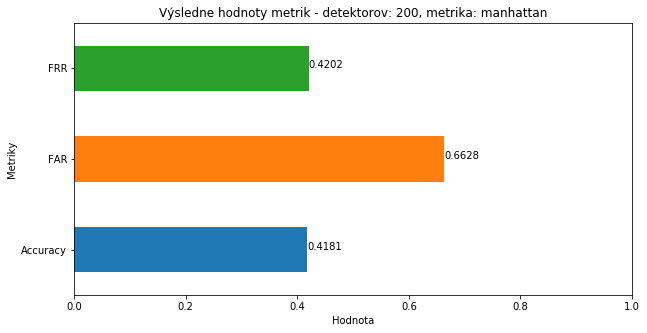

In [363]:
# data to use to plot results
mean_results = results_by_users.copy() # .drop(['user_id'], axis=1)
mean_results = mean_results.rename(columns={'accuracy_score_ns': 'Accuracy', 'far_ns': 'FAR', 'frr_ns': 'FRR'})
mean_results = mean_results.drop(['user_id'], axis=1).mean()

ax = mean_results.plot(
    kind = 'barh',
    legend = False,
    title = "Výsledne hodnoty metrik - detektorov: " + str(detectors_max_count) + ", metrika: " + distance_metric,
    xlim = (0, 1),
    figsize=(10, 5)
)
ax.set_xlabel('Hodnota')
ax.set_ylabel('Metriky')
for index, value in enumerate(mean_results):
    ax.text(value, index, str(round(value, 4)))

# save plot to file
plt.savefig(
    plot_path + 
    'results' + '_' +
    str(distance) + '_' + 
    str(detectors_distance) + '_' + 
    str(predicting_threshold) + '_' + 
    str(learning_threshold) + '_' + 
    str(int(detectors_max_count)) + '_' + 
    metric  + 
    '.png'
    )